In [0]:
%tensorflow_version 1.x 

#Suppress warnings which keep poping up
import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [33]:
print(train_features.shape)

(50000, 32, 32, 3)


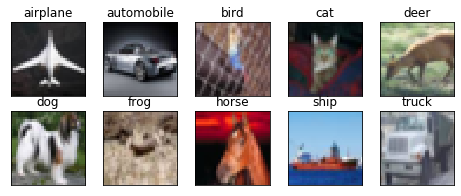

In [34]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)


Epoch 1/50
390/390 [==============================] - 37s 94ms/step - loss: 1.9030 - acc: 0.2732 - val_loss: 1.5160 - val_acc: 0.4494
Epoch 2/50
390/390 [==============================] - 35s 90ms/step - loss: 1.4763 - acc: 0.4593 - val_loss: 1.2407 - val_acc: 0.5463
Epoch 3/50
390/390 [==============================] - 34s 86ms/step - loss: 1.3063 - acc: 0.5294 - val_loss: 1.1219 - val_acc: 0.5929
Epoch 4/50
390/390 [==============================] - 36s 91ms/step - loss: 1.1841 - acc: 0.5801 - val_loss: 1.0030 - val_acc: 0.6443
Epoch 5/50
390/390 [==============================] - 33s 85ms/step - loss: 1.1048 - acc: 0.6140 - val_loss: 0.9890 - val_acc: 0.6495
Epoch 6/50
390/390 [==============================] - 35s 90ms/step - loss: 1.0320 - acc: 0.6419 - val_loss: 0.9735 - val_acc: 0.6620
Epoch 7/50
390/390 [==============================] - 35s 89ms/step - loss: 0.9700 - acc: 0.6633 - val_loss: 0.8003 - val_acc: 0.7189
Epoch 8/50
390/390 [==============================] - 34s 87ms

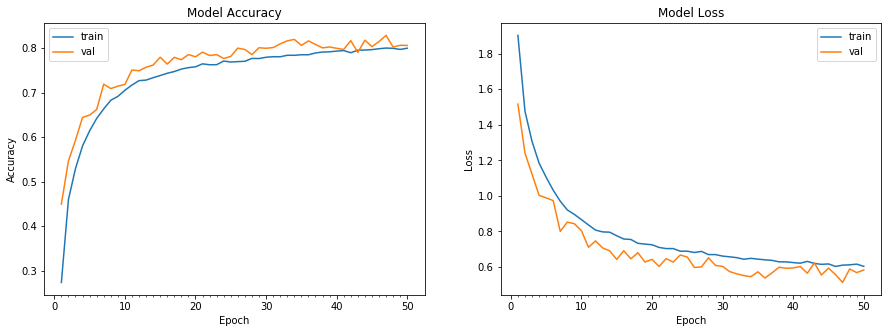

Accuracy on test data is: 80.60


In [44]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
my_model = Sequential()

my_model.add(SeparableConvolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3), activation='relu')) # 32*32*64, rf: 3
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(64, 3, 3, border_mode='valid', activation='relu')) # 30*30*64, rf: 5
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(MaxPooling2D(pool_size=(2, 2))) # 15*15*64, rf: 9
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='same', activation='relu')) # 15*15*128, rf: 13
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='valid', activation='relu')) # 13*13*128 rf: 17
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(MaxPooling2D(pool_size=(2, 2))) # 6*6*128 rf: 25
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='same', activation='relu')) # 6*6*128 rf: 33
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(SeparableConvolution2D(128, 3, 3, border_mode='valid', activation='relu')) # 4*4*128 rf: 41
my_model.add(BatchNormalization())
my_model.add(Dropout(0.1))

my_model.add(AveragePooling2D()) # 2*2*128 rf: ? 
my_model.add(Flatten()) # 512, rf: ?
my_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
my_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_43 (Separab (None, 32, 32, 64)        283       
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_67 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_44 (Separab (None, 30, 30, 64)        4736      
_________________________________________________________________
batch_normalization_44 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_68 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)      

Epoch 1/50
781/781 [==============================] - 49s 63ms/step - loss: 1.5242 - acc: 0.4515 - val_loss: 1.2618 - val_acc: 0.5666
Epoch 2/50
781/781 [==============================] - 46s 59ms/step - loss: 1.1929 - acc: 0.5755 - val_loss: 1.0828 - val_acc: 0.6210
Epoch 3/50
781/781 [==============================] - 46s 59ms/step - loss: 1.0567 - acc: 0.6265 - val_loss: 1.0791 - val_acc: 0.6447
Epoch 4/50
781/781 [==============================] - 46s 59ms/step - loss: 0.9630 - acc: 0.6602 - val_loss: 0.8587 - val_acc: 0.7033
Epoch 5/50
781/781 [==============================] - 46s 59ms/step - loss: 0.8983 - acc: 0.6833 - val_loss: 0.8271 - val_acc: 0.7172
Epoch 6/50
781/781 [==============================] - 46s 59ms/step - loss: 0.8555 - acc: 0.6994 - val_loss: 0.7568 - val_acc: 0.7446
Epoch 7/50
781/781 [==============================] - 46s 59ms/step - loss: 0.8197 - acc: 0.7130 - val_loss: 0.7577 - val_acc: 0.7379
Epoch 8/50
781/781 [==============================] - 46s 59ms

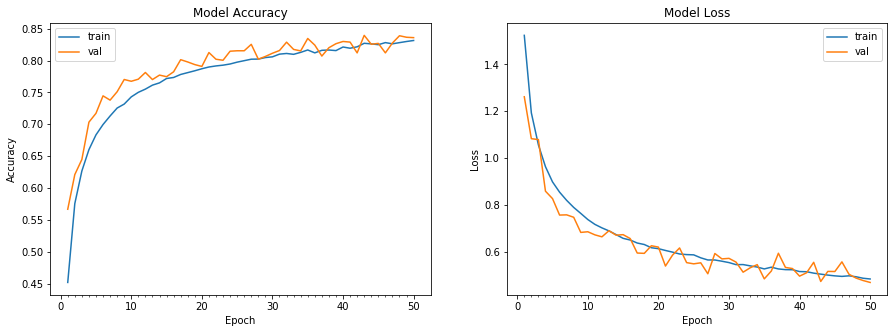

Accuracy on test data is: 83.60


In [43]:
# train the model
my_start = time.time()
# Train the model
my_model_info = my_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
my_end = time.time()
print ("Model took %0.2f seconds to train"%(my_end - my_start))
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, my_model))